This project is from the segmentation area. The task is to make segments of different users who are having the same characteristics. Industries use these segments to target their users with a set of campaigns.

This project will use the KMeans clustering to define different clusters based on the silhouette scores of different clusters.

In the end, we will get an excel file with different segments of users to target our marketing strategies.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

In [3]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

In [5]:
# reading data into dataframe
Cust= pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\Segmenting Credit Card Users\CC GENERAL.csv")

In [6]:
Cust.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
### Exporting pandas profiling output to html file

output = pandas_profiling.ProfileReport(Cust)

output.to_file(output_file='pandas_profiling.html')

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Cols to drop
CUST_ID,ONEOFF_PURCHASES

In [8]:
Cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
Cust.drop(["CUST_ID","ONEOFF_PURCHASES"], axis=1, inplace=True)

In [10]:
Cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   INSTALLMENTS_PURCHASES            8950 non-null   float64
 4   CASH_ADVANCE                      8950 non-null   float64
 5   PURCHASES_FREQUENCY               8950 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 8   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 9   CASH_ADVANCE_TRX                  8950 non-null   int64  
 10  PURCHASES_TRX                     8950 non-null   int64  
 11  CREDIT_LIMIT                      8949 non-null   float64
 12  PAYMEN

In [11]:
Cust.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

In [12]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99), lower=x.quantile(0.01))
    return x

Cust=Cust.apply(lambda x: outlier_capping(x))

In [13]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

Cust=Cust.apply(lambda x: Missing_imputation(x))

In [14]:
Cust.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.336473,0.165697,0.093372,0.541226,-0.087193,0.070796,-0.072010,0.463637,0.445766,0.133319,0.528972,0.344744,0.587668,-0.331618,0.074122
BALANCE_FREQUENCY,0.336473,1.000000,0.170515,0.153734,0.107785,0.232890,0.202845,0.179472,0.193894,0.162818,0.212610,0.098461,0.092491,0.208279,-0.098040,0.121525
PURCHASES,0.165697,0.170515,1.000000,0.708735,-0.091164,0.504218,0.608351,0.400843,-0.149419,-0.099497,0.780817,0.367477,0.536270,0.131455,0.202887,0.107263
INSTALLMENTS_PURCHASES,0.093372,0.153734,0.708735,1.000000,-0.102052,0.551693,0.248240,0.634500,-0.162397,-0.111387,0.687538,0.239973,0.369886,0.148561,0.215048,0.103310
CASH_ADVANCE,0.541226,0.107785,-0.091164,-0.102052,1.000000,-0.249835,-0.104954,-0.207395,0.683400,0.710309,-0.112613,0.314398,0.425517,0.257143,-0.179068,-0.083485
PURCHASES_FREQUENCY,-0.087193,0.232890,0.504218,0.551693,-0.249835,1.000000,0.501343,0.862934,-0.312493,-0.238395,0.642234,0.119658,0.120897,0.001043,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.070796,0.202845,0.608351,0.248240,-0.104954,0.501343,1.000000,0.142329,-0.113575,-0.081339,0.601289,0.296128,0.278313,-0.016426,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.072010,0.179472,0.400843,0.634500,-0.207395,0.862934,0.142329,1.000000,-0.265907,-0.200169,0.593674,0.060279,0.097830,0.032330,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.463637,0.193894,-0.149419,-0.162397,0.683400,-0.312493,-0.113575,-0.265907,1.000000,0.881092,-0.151307,0.134731,0.215544,0.203585,-0.253292,-0.129136
CASH_ADVANCE_TRX,0.445766,0.162818,-0.099497,-0.111387,0.710309,-0.238395,-0.081339,-0.200169,0.881092,1.000000,-0.096709,0.160628,0.274589,0.235553,-0.201056,-0.051821


<AxesSubplot:>

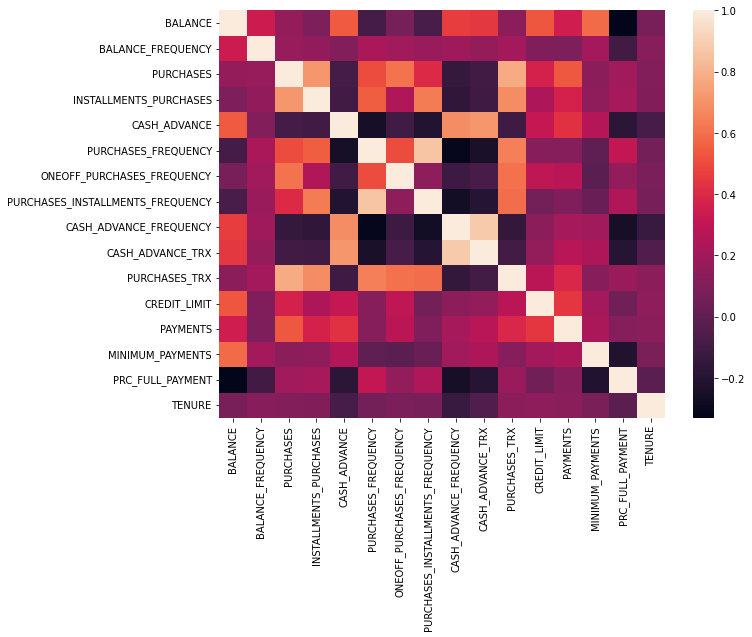

In [15]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(Cust.corr())

### Standardrizing data
To put data on the same scale

In [16]:
sc=StandardScaler()
Cust_scaled=sc.fit_transform(Cust)
pd.DataFrame(Cust_scaled).shape

(8950, 16)

### Applying PCA

In [17]:
pc = PCA(n_components=16)
pc.fit(Cust_scaled)

PCA(n_components=16)

In [18]:
pc.explained_variance_

array([4.49294562, 3.71013917, 1.31312801, 1.23637776, 0.98854472,
       0.90781906, 0.74531867, 0.64361486, 0.56588142, 0.44287711,
       0.25748003, 0.2185639 , 0.19247972, 0.14086715, 0.10475678,
       0.04099392])

In [19]:
#Eigen values
sum(pc.explained_variance_)

16.00178790926362

In [20]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_
var

array([0.28077773, 0.23185779, 0.08206133, 0.07726498, 0.06177714,
       0.05673235, 0.04657721, 0.04022143, 0.03536364, 0.02767673,
       0.0160907 , 0.01365872, 0.01202864, 0.00880321, 0.00654657,
       0.00256183])

In [21]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([ 28.08,  51.27,  59.48,  67.21,  73.39,  79.06,  83.72,  87.74,
        91.28,  94.05,  95.66,  97.03,  98.23,  99.11,  99.76, 100.02])

Number of components have choosen as 6 based on cumulative variacne is explaining >75 % and individual component explaining >0.8 variance

In [22]:
pc_final=PCA(n_components=6).fit(Cust_scaled)
pc_final.explained_variance_

array([4.49294562, 3.71013917, 1.31312801, 1.23637776, 0.98854472,
       0.90781906])

In [23]:
reduced_cr=pc_final.transform(Cust_scaled) 
dimensions = pd.DataFrame(reduced_cr)
dimensions

,0,1,2,3,4,5
0,-1.568068,-1.590712,-0.433800,-0.499811,-0.018647,-0.176656
1,-1.710546,2.560827,0.940659,-0.657582,0.750505,-0.715697
2,0.968049,-0.212456,-0.462638,-1.437203,-2.371268,0.525640
3,-1.218497,-0.449040,0.230053,-1.585376,0.201449,0.368019
4,-1.571051,-1.152649,-0.721283,-0.687674,-0.542942,-0.209158
...,...,...,...,...,...,...
8945,0.100498,-2.140022,0.687782,3.272804,0.076013,2.325924
8946,-0.165045,-1.819638,-0.181686,3.077168,-0.096691,2.912474
8947,-0.588996,-2.103828,0.671747,2.745200,0.133976,2.809187
8948,-2.397229,-1.368608,1.332355,1.839629,-0.392644,2.904258


In [24]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5", "C6"]
dimensions.head()

,C1,C2,C3,C4,C5,C6
0,-1.568068,-1.590712,-0.433800,-0.499811,-0.018647,-0.176656
1,-1.710546,2.560827,0.940659,-0.657582,0.750505,-0.715697
2,0.968049,-0.212456,-0.462638,-1.437203,-2.371268,0.525640
3,-1.218497,-0.449040,0.230053,-1.585376,0.201449,0.368019
4,-1.571051,-1.152649,-0.721283,-0.687674,-0.542942,-0.209158


### Factor Loading Matrix
Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [25]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=Cust.columns).T
Loadings.to_csv("Loadings.csv")

### Clustering

In [26]:
#selected the list variables from PCA based on factor loading matrics
list_var = ['PURCHASES_TRX','INSTALLMENTS_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY','MINIMUM_PAYMENTS','BALANCE','CREDIT_LIMIT','CASH_ADVANCE','PRC_FULL_PAYMENT','TENURE','BALANCE_FREQUENCY','PURCHASES','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PAYMENTS']

In [27]:
Cust_scaled1=pd.DataFrame(Cust_scaled, columns=Cust.columns)
Cust_scaled1.head(5)

Cust_scaled2=Cust_scaled1[list_var]
Cust_scaled2.head(5)

,PURCHASES_TRX,INSTALLMENTS_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,MINIMUM_PAYMENTS,BALANCE,CREDIT_LIMIT,CASH_ADVANCE,PRC_FULL_PAYMENT,TENURE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PAYMENTS
0,-0.579714,-0.427513,-0.707313,-0.486172,-0.762856,-0.978415,-0.527079,-0.525551,0.36068,-0.255968,-0.551327,-0.806490,-0.678661,-0.685371,-0.557505,-0.642945
1,-0.675130,-0.568588,-0.916995,0.255009,0.844867,0.711297,3.101370,0.234227,0.36068,0.132501,-0.613881,-1.221758,-0.678661,0.593147,0.166685,1.089747
2,-0.102638,-0.568588,-0.916995,-0.098610,0.485181,0.852106,-0.527079,-0.525551,0.36068,0.520970,-0.106917,1.269843,2.673451,-0.685371,-0.557505,-0.456289
3,-0.627422,-0.568588,-0.916995,-0.348846,0.063882,0.852106,-0.411186,-0.525551,0.36068,-1.032906,0.369006,-1.014125,-0.399319,-0.259200,-0.376457,-0.732573
4,-0.627422,-0.568588,-0.916995,-0.402520,-0.367830,-0.922091,-0.527079,-0.525551,0.36068,0.520970,-0.603389,-1.014125,-0.399319,-0.685371,-0.557505,-0.431298


### Segmentation

In [28]:
km_3=KMeans(n_clusters=3,random_state=123)
km_3.fit(Cust_scaled2)

KMeans(n_clusters=3, random_state=123)

In [29]:
print(km_3.labels_)

[0 1 0 ... 0 0 0]


In [30]:
km_3.cluster_centers_

array([[-0.30961375, -0.27301099, -0.12282894, -0.22625184, -0.3829179 ,
        -0.35769277, -0.33995004, -0.00727166, -0.05160472, -0.20872655,
        -0.32070458, -0.12848011, -0.24549521, -0.32524948, -0.33420142,
        -0.34969499],
       [-0.40347765, -0.37127115, -0.54382624,  0.650526  ,  1.19999086,
         0.60823811,  1.54490289, -0.40510351, -0.10165247,  0.34484072,
        -0.34903071, -0.62495272, -0.29402931,  1.56304241,  1.53454807,
         0.53954417],
       [ 1.59794628,  1.42514614,  1.03298211,  0.18467149,  0.20958664,
         0.72890966, -0.31260388,  0.44892016,  0.30211067,  0.43583484,
         1.58354179,  1.13884935,  1.24010141, -0.38741657, -0.32371577,
         0.76990096]])

In [31]:
km_4=KMeans(n_clusters=4,random_state=123).fit(Cust_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(Cust_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(Cust_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(Cust_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(Cust_scaled2)
#km_5.labels_

In [32]:
metrics.silhouette_score(Cust_scaled2, km_3.labels_)

0.24766406648497127

In [33]:
# 5 clusters are better
# Conactenating labels found through Kmeans with data 

# save the cluster labels and sort by cluster
Cust['cluster_3'] = km_3.labels_
Cust['cluster_4'] = km_4.labels_
Cust['cluster_5'] = km_5.labels_
Cust['cluster_6'] = km_6.labels_
Cust['cluster_7'] = km_7.labels_
Cust['cluster_8'] = km_8.labels_

In [34]:
Cust.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,...,201.802084,139.509787,0.000000,12,0,3,4,4,3,0
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,...,4103.032597,1072.340217,0.222222,12,1,2,3,3,2,1
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,622.066742,627.284787,0.000000,12,0,1,0,0,0,5
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,...,0.000000,312.343947,0.000000,12,0,3,4,4,3,0
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,...,678.334763,244.791237,0.000000,12,0,3,4,4,3,0


### Choosing number clusters using Silhouette Coefficient

In [35]:
# calculate SC for K=6
from sklearn import metrics
metrics.silhouette_score(Cust_scaled2, km_3.labels_)

0.24766406648497127

In [36]:
# calculate SC for K=3 through K=9
k_range = range(3, 13)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(Cust_scaled2)
    scores.append(metrics.silhouette_score(Cust_scaled2, km.labels_))
scores

[0.24766406648497127,
 0.1955462707907686,
 0.1935691506156716,
 0.20496659642823262,
 0.21508899793816583,
 0.22234225192243495,
 0.20103958086776635,
 0.20130978420281054,
 0.20316369871853138,
 0.21120509989311076]

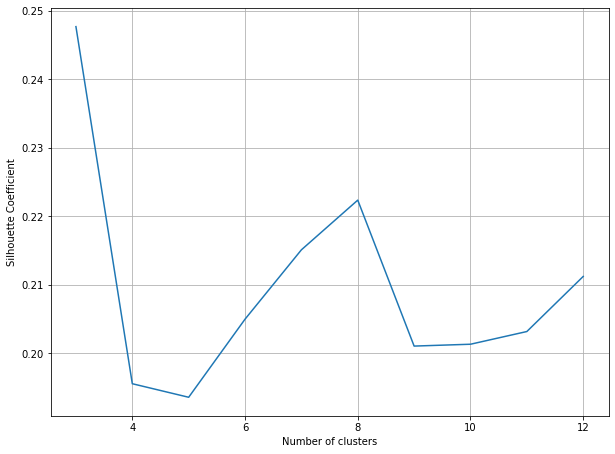

In [37]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### Segment Distribution

In [38]:
Cust.cluster_3.value_counts()*100/sum(Cust.cluster_3.value_counts())

0    65.128492
1    17.765363
2    17.106145
Name: cluster_3, dtype: float64

In [39]:
pd.Series.sort_index(Cust.cluster_3.value_counts())

0    5829
1    1590
2    1531
Name: cluster_3, dtype: int64

### Profiling

In [40]:
size=pd.concat([pd.Series(Cust.cluster_3.size), pd.Series.sort_index(Cust.cluster_3.value_counts()), pd.Series.sort_index(Cust.cluster_4.value_counts()),
           pd.Series.sort_index(Cust.cluster_5.value_counts()), pd.Series.sort_index(Cust.cluster_6.value_counts()),
           pd.Series.sort_index(Cust.cluster_7.value_counts()), pd.Series.sort_index(Cust.cluster_8.value_counts())])

In [41]:
size

0    8950
0    5829
1    1590
2    1531
0     712
1    3135
2    1273
3    3830
0    2919
1     693
2    1341
3    1100
4    2897
0    2726
1     625
2    1211
3    1026
4    2704
5     658
0    1060
1    1948
2    1017
3    2638
4     615
5     480
6    1192
0    2610
1     974
2     168
3    1892
4     455
5    1056
6    1184
7     611
dtype: int64

In [42]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/Cust.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950,5829,1590,1531,712,3135,1273,3830,2919,693,...,480,1192,2610,974,168,1892,455,1056,1184,611


In [43]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.651285,0.177654,0.171061,0.079553,0.350279,0.142235,0.427933,0.326145,0.07743,...,0.053631,0.133184,0.29162,0.108827,0.018771,0.211397,0.050838,0.117989,0.132291,0.068268


In [44]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.0,5829.000000,1590.000000,1531.000000,712.000000,3135.000000,1273.000000,3830.000000,2919.000000,693.00000,...,480.000000,1192.000000,2610.00000,974.000000,168.000000,1892.000000,455.000000,1056.000000,1184.000000,611.000000
Seg_Pct,1.0,0.651285,0.177654,0.171061,0.079553,0.350279,0.142235,0.427933,0.326145,0.07743,...,0.053631,0.133184,0.29162,0.108827,0.018771,0.211397,0.050838,0.117989,0.132291,0.068268


In [45]:
Cust.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,...,201.802084,139.509787,0.000000,12,0,3,4,4,3,0
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,...,4103.032597,1072.340217,0.222222,12,1,2,3,3,2,1
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,622.066742,627.284787,0.000000,12,0,1,0,0,0,5
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,...,0.000000,312.343947,0.000000,12,0,3,4,4,3,0
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,...,678.334763,244.791237,0.000000,12,0,3,4,4,3,0


In [46]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([Cust.apply(lambda x: x.mean()).T, Cust.groupby('cluster_3').apply(lambda x: x.mean()).T, Cust.groupby('cluster_4').apply(lambda x: x.mean()).T,
          Cust.groupby('cluster_5').apply(lambda x: x.mean()).T, Cust.groupby('cluster_6').apply(lambda x: x.mean()).T,
          Cust.groupby('cluster_7').apply(lambda x: x.mean()).T, Cust.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

In [47]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE,1541.046707,788.113656,3904.471743,1953.196246,2843.297037,782.310601,4335.792286,991.105279,806.460583,2879.204574,...,3313.751596,101.572090,1516.361149,4633.419703,3639.784483,692.711848,3219.641658,1235.748234,101.701632,833.581350
BALANCE_FREQUENCY,0.878083,0.829210,0.959045,0.980077,0.983908,0.927522,0.965667,0.788832,0.959252,0.983992,...,0.985715,0.377916,0.973180,0.967232,0.988937,0.953909,0.984931,0.971502,0.376039,0.796309
PURCHASES,936.229237,446.969274,404.430597,3351.288779,4922.007935,1046.742351,451.750786,265.839687,1100.957811,4962.748889,...,5519.598625,333.407878,243.222161,498.701160,990.903810,906.898377,5604.827209,2082.329242,333.030566,381.242357
INSTALLMENTS_PURCHASES,384.498368,199.810666,133.600296,1348.229624,1841.928335,553.509432,154.231603,51.754183,571.568917,1863.097842,...,2213.914739,129.803121,46.979904,172.790041,616.328348,716.601876,2237.220643,408.557235,129.292154,144.906203
CASH_ADVANCE,935.920972,332.649691,3682.021715,380.838098,608.683067,175.823275,4113.876027,562.647574,185.335889,571.945895,...,650.758061,295.485832,707.658764,4650.064193,756.454553,177.585176,660.990412,226.610176,297.482358,1055.638610
PURCHASES_FREQUENCY,0.490351,0.438635,0.239828,0.947426,0.955514,0.870688,0.270452,0.165645,0.883221,0.955978,...,0.962303,0.270628,0.152801,0.292748,0.507013,0.886788,0.964078,0.883140,0.269135,0.412113
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.129177,0.114887,0.572404,0.662464,0.266640,0.130487,0.088328,0.283880,0.661988,...,0.644741,0.071849,0.087618,0.140014,0.080477,0.085251,0.658921,0.771665,0.071758,0.118616
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.315514,0.148493,0.774971,0.819540,0.694701,0.168345,0.074677,0.700509,0.822047,...,0.875670,0.191486,0.065982,0.189472,0.458372,0.840089,0.877813,0.421427,0.190105,0.276568
CASH_ADVANCE_FREQUENCY,0.134017,0.070558,0.439603,0.058262,0.076624,0.039067,0.462798,0.113127,0.040216,0.073674,...,0.078974,0.029873,0.150627,0.491549,0.096516,0.036911,0.079101,0.047062,0.030075,0.196725
CASH_ADVANCE_TRX,3.079330,1.235890,11.559119,1.291313,1.935393,0.708453,12.655145,2.049869,0.727646,1.809524,...,2.047917,0.634228,2.846743,14.130390,2.714286,0.699789,2.070330,0.860795,0.638514,3.240589


In [48]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,5829.000000,1590.000000,1531.000000,712.000000,3135.000000,1273.000000,3830.000000,2919.000000,693.000000,...,480.000000,1192.000000,2610.000000,974.000000,168.000000,1892.000000,455.000000,1056.000000,1184.000000,611.000000
Seg_Pct,1.000000,0.651285,0.177654,0.171061,0.079553,0.350279,0.142235,0.427933,0.326145,0.077430,...,0.053631,0.133184,0.291620,0.108827,0.018771,0.211397,0.050838,0.117989,0.132291,0.068268
BALANCE,1541.046707,788.113656,3904.471743,1953.196246,2843.297037,782.310601,4335.792286,991.105279,806.460583,2879.204574,...,3313.751596,101.572090,1516.361149,4633.419703,3639.784483,692.711848,3219.641658,1235.748234,101.701632,833.581350
BALANCE_FREQUENCY,0.878083,0.829210,0.959045,0.980077,0.983908,0.927522,0.965667,0.788832,0.959252,0.983992,...,0.985715,0.377916,0.973180,0.967232,0.988937,0.953909,0.984931,0.971502,0.376039,0.796309
PURCHASES,936.229237,446.969274,404.430597,3351.288779,4922.007935,1046.742351,451.750786,265.839687,1100.957811,4962.748889,...,5519.598625,333.407878,243.222161,498.701160,990.903810,906.898377,5604.827209,2082.329242,333.030566,381.242357
INSTALLMENTS_PURCHASES,384.498368,199.810666,133.600296,1348.229624,1841.928335,553.509432,154.231603,51.754183,571.568917,1863.097842,...,2213.914739,129.803121,46.979904,172.790041,616.328348,716.601876,2237.220643,408.557235,129.292154,144.906203
CASH_ADVANCE,935.920972,332.649691,3682.021715,380.838098,608.683067,175.823275,4113.876027,562.647574,185.335889,571.945895,...,650.758061,295.485832,707.658764,4650.064193,756.454553,177.585176,660.990412,226.610176,297.482358,1055.638610
PURCHASES_FREQUENCY,0.490351,0.438635,0.239828,0.947426,0.955514,0.870688,0.270452,0.165645,0.883221,0.955978,...,0.962303,0.270628,0.152801,0.292748,0.507013,0.886788,0.964078,0.883140,0.269135,0.412113
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.129177,0.114887,0.572404,0.662464,0.266640,0.130487,0.088328,0.283880,0.661988,...,0.644741,0.071849,0.087618,0.140014,0.080477,0.085251,0.658921,0.771665,0.071758,0.118616
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.315514,0.148493,0.774971,0.819540,0.694701,0.168345,0.074677,0.700509,0.822047,...,0.875670,0.191486,0.065982,0.189472,0.458372,0.840089,0.877813,0.421427,0.190105,0.276568


In [49]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8']
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,5829.000000,1590.000000,1531.000000,712.000000,3135.000000,1273.000000,3830.000000,2919.000000,693.000000,...,480.000000,1192.000000,2610.000000,974.000000,168.000000,1892.000000,455.000000,1056.000000,1184.000000,611.000000
Seg_Pct,1.000000,0.651285,0.177654,0.171061,0.079553,0.350279,0.142235,0.427933,0.326145,0.077430,...,0.053631,0.133184,0.291620,0.108827,0.018771,0.211397,0.050838,0.117989,0.132291,0.068268
BALANCE,1541.046707,788.113656,3904.471743,1953.196246,2843.297037,782.310601,4335.792286,991.105279,806.460583,2879.204574,...,3313.751596,101.572090,1516.361149,4633.419703,3639.784483,692.711848,3219.641658,1235.748234,101.701632,833.581350
BALANCE_FREQUENCY,0.878083,0.829210,0.959045,0.980077,0.983908,0.927522,0.965667,0.788832,0.959252,0.983992,...,0.985715,0.377916,0.973180,0.967232,0.988937,0.953909,0.984931,0.971502,0.376039,0.796309
PURCHASES,936.229237,446.969274,404.430597,3351.288779,4922.007935,1046.742351,451.750786,265.839687,1100.957811,4962.748889,...,5519.598625,333.407878,243.222161,498.701160,990.903810,906.898377,5604.827209,2082.329242,333.030566,381.242357
INSTALLMENTS_PURCHASES,384.498368,199.810666,133.600296,1348.229624,1841.928335,553.509432,154.231603,51.754183,571.568917,1863.097842,...,2213.914739,129.803121,46.979904,172.790041,616.328348,716.601876,2237.220643,408.557235,129.292154,144.906203
CASH_ADVANCE,935.920972,332.649691,3682.021715,380.838098,608.683067,175.823275,4113.876027,562.647574,185.335889,571.945895,...,650.758061,295.485832,707.658764,4650.064193,756.454553,177.585176,660.990412,226.610176,297.482358,1055.638610
PURCHASES_FREQUENCY,0.490351,0.438635,0.239828,0.947426,0.955514,0.870688,0.270452,0.165645,0.883221,0.955978,...,0.962303,0.270628,0.152801,0.292748,0.507013,0.886788,0.964078,0.883140,0.269135,0.412113
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.129177,0.114887,0.572404,0.662464,0.266640,0.130487,0.088328,0.283880,0.661988,...,0.644741,0.071849,0.087618,0.140014,0.080477,0.085251,0.658921,0.771665,0.071758,0.118616
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.315514,0.148493,0.774971,0.819540,0.694701,0.168345,0.074677,0.700509,0.822047,...,0.875670,0.191486,0.065982,0.189472,0.458372,0.840089,0.877813,0.421427,0.190105,0.276568


In [50]:
Profling_output_final.to_csv('Profiling_output.csv')